# CIFAR-10 Multiple Classes

Let's go over another example of using Keras and building out CNNs. This time will use another famous data set, the CIFAR-10 dataset which consists of 10 different image types.

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [1]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 746s 4us/step


In [2]:
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_train[0].shape

(32, 32, 3)

In [4]:
import matplotlib.pyplot as plt

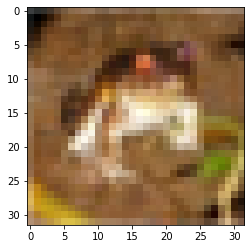

In [5]:
# FROG
plt.imshow(x_train[0])

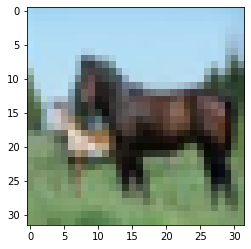

In [6]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [7]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
x_train[0].shape

(32, 32, 3)

In [9]:
x_train.max()

255

In [10]:
x_train = x_train/225

In [11]:
x_test = x_test/255

In [12]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [14]:
from keras.utils import to_categorical

In [15]:
y_train.shape

(50000, 1)

In [16]:
y_train[0]

array([6], dtype=uint8)

In [17]:
y_cat_train = to_categorical(y_train,10)

In [18]:
y_cat_train.shape

(50000, 10)

In [19]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [20]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [22]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [24]:
model.fit(x_train,y_cat_train,verbose=1,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.5057 - accuracy: 0.4597
Epoch 2/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.1670 - accuracy: 0.5922
Epoch 3/10
1563/1563 [==============================] - 85s 54ms/step - loss: 1.0182 - accuracy: 0.6448
Epoch 4/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.9120 - accuracy: 0.6844
Epoch 5/10
1563/1563 [==============================] - 82s 53ms/step - loss: 0.8333 - accuracy: 0.7135
Epoch 6/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.7622 - accuracy: 0.7377
Epoch 7/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.7082 - accuracy: 0.7588
Epoch 8/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.6661 - accuracy: 0.7709
Epoch 9/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6209 - accuracy: 0.7909
Epoch 10/10
1563/1563 [==============================] - 81s 52m

In [25]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [26]:
model.metrics_names

['loss', 'accuracy']

In [27]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.1314 - accuracy: 0.6705


[1.1313565969467163, 0.6704999804496765]

In [28]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.61      0.68      1000
           1       0.86      0.77      0.81      1000
           2       0.61      0.51      0.55      1000
           3       0.47      0.52      0.49      1000
           4       0.60      0.70      0.64      1000
           5       0.54      0.56      0.55      1000
           6       0.75      0.74      0.74      1000
           7       0.82      0.67      0.74      1000
           8       0.62      0.88      0.72      1000
           9       0.80      0.76      0.78      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



## Optional: Large Model

In [30]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 512 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(512, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [31]:
model.fit(x_train,y_cat_train,verbose=1,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 294s 188ms/step - loss: 1.5997 - accuracy: 0.4252
Epoch 2/20
1563/1563 [==============================] - 295s 189ms/step - loss: 1.1619 - accuracy: 0.5933
Epoch 3/20
1563/1563 [==============================] - 285s 182ms/step - loss: 0.9967 - accuracy: 0.6553
Epoch 4/20
1563/1563 [==============================] - 287s 184ms/step - loss: 0.9239 - accuracy: 0.6851
Epoch 5/20
1563/1563 [==============================] - 269s 172ms/step - loss: 0.9019 - accuracy: 0.6973
Epoch 6/20
1563/1563 [==============================] - 264s 169ms/step - loss: 0.8782 - accuracy: 0.7043
Epoch 7/20
1563/1563 [==============================] - 273s 175ms/step - loss: 0.8707 - accuracy: 0.7082
Epoch 8/20
1563/1563 [==============================] - 251s 161ms/step - loss: 0.8691 - accuracy: 0.7106
Epoch 9/20
1563/1563 [==============================] - 259s 166ms/step - loss: 0.8602 - accuracy: 0.7142
Epoch 10/20
1563/1563 [=======================

In [32]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 10s 33ms/step - loss: 1.0960 - accuracy: 0.6702


[1.095985770225525, 0.670199990272522]

In [33]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71      1000
           1       0.93      0.73      0.82      1000
           2       0.54      0.60      0.57      1000
           3       0.49      0.59      0.53      1000
           4       0.51      0.79      0.62      1000
           5       0.73      0.48      0.58      1000
           6       0.89      0.59      0.71      1000
           7       0.82      0.66      0.73      1000
           8       0.65      0.87      0.74      1000
           9       0.89      0.63      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.71      0.67      0.67     10000
weighted avg       0.71      0.67      0.67     10000



In [35]:
model.save('larger_CIFAR10_model.h5')

___